Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

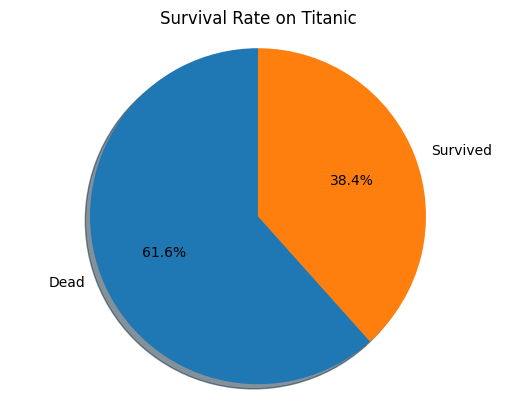

In [5]:
sizes = df['Survived'].value_counts()
plt.pie(sizes, labels=('Dead', 'Survived'),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Survival Rate on Titanic')
plt.show()

На круговій діаграмі (pie chart) зображено 2 сектори:
- Dead (синій) відображає відсоток загиблих (61.6%)
- Survived (помаранчевий) відображає відсоток уцілілих (38.4%)

Отже, на кораблі більшість пасажирів загинуло

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


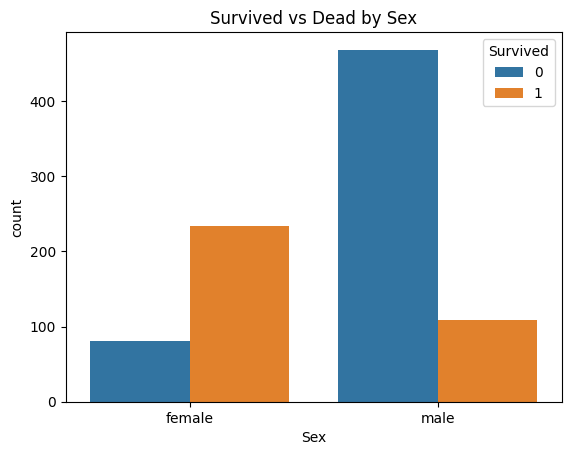

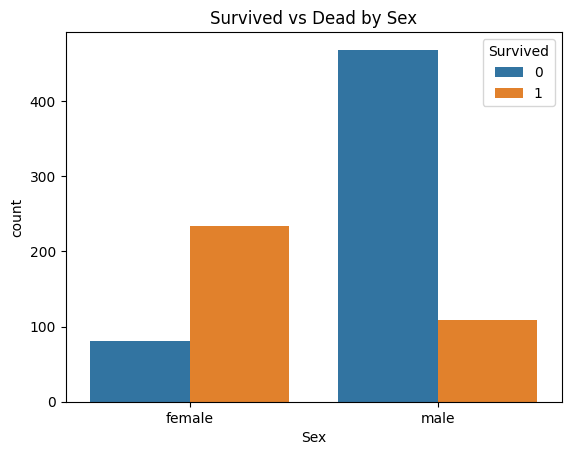

In [6]:
survived_sex = df.groupby(['Sex', 'Survived'], as_index=False).size()
sns.barplot(data=survived_sex, x='Sex', y='size', hue='Survived')
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Survived vs Dead by Sex")
plt.show()

На діаграмі можна побачити співвідношення загиблих і вцілілих для кожної статі:
- жінки: <100 загинули і >200 вижили
- чоловіки: <500 загинули, ~100 вижили

Видно, що серед чоловіків частина загиблих значно більша, ніж серед жінок

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

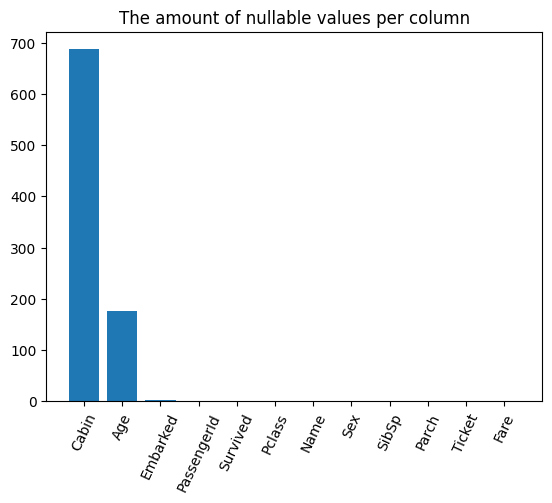

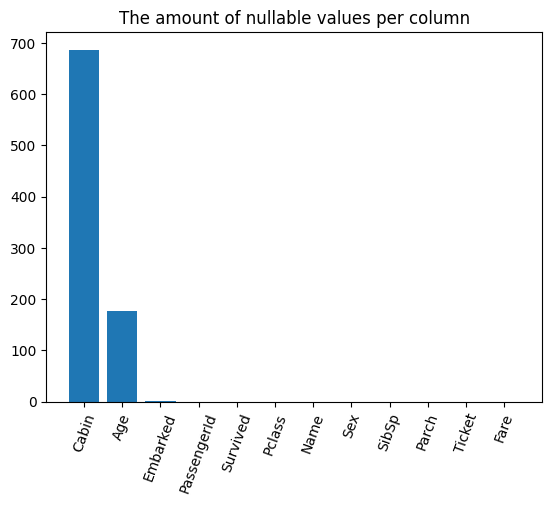

In [7]:
missing_values = df.isnull().sum().sort_values(ascending=False)
plt.bar(missing_values.index, missing_values)
plt.title('The amount of nullable values per column')
plt.xticks(rotation=70)
plt.show()

На діаграмі видно кількість порожніх значень для кожної колонки таблиці в порядку спадання.

Бачимо, що колонка Cabin має майже 700 порожніх значень з 890, тож її варто видалити при очищенні даних.

Колонка з віком пасажирів має майже 200 порожніх значень, але це припустимо для подальшої роботи з датасетом.

Решта колонок мають незначну кількість пропущених значень або взагалі їх не мають.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

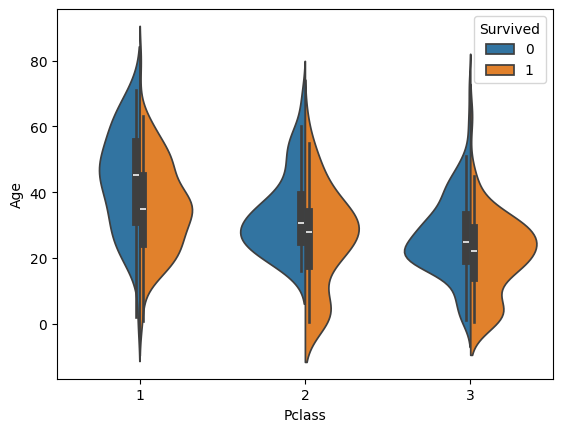

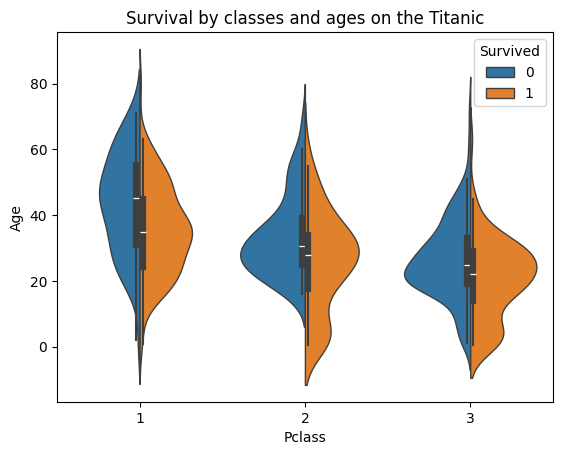

In [8]:
df['Pclass'] = df['Pclass'].astype('category')
sns.violinplot(x='Pclass', y='Age', hue='Survived',
               data=df, split=True, linewidth=1)
plt.title('Survival by classes and ages on the Titanic')
plt.show()

На скрипковій діаграмі зображено співвідношення померлих до вцілілих, розподілених за віком, для кожного з 3 класів:

- 1 клас: кількість вижилих трохи більша за кількість загиблих; серед загиблих
переважають люди віком між 40 і 60 років, серед уцілілих — від 30 до 45, проте розподіл за віком для обох сторін графіка плавніший, ніж у наступних двох класах, однак різниця між середнім віком загиблих і вижилих помітно вища;

- 2 клас: середній вік усіх пасажирів близько на 10 років нижчий, ніж у 1 класі; левова частка померлих припадає на вік 20—40 років, для вцілілих — теж, проте також видно, що серед пасажирів віком до 20 років майже всі вижили;

- 3 клас: середній вік усіх пасажирів близько на 5 років нижчий, ніж у 2 класі; найбільша кількість як загиблих, так і вцілілих зосереджена в області 10—35 років; більшість дітей до 10 років вижили.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


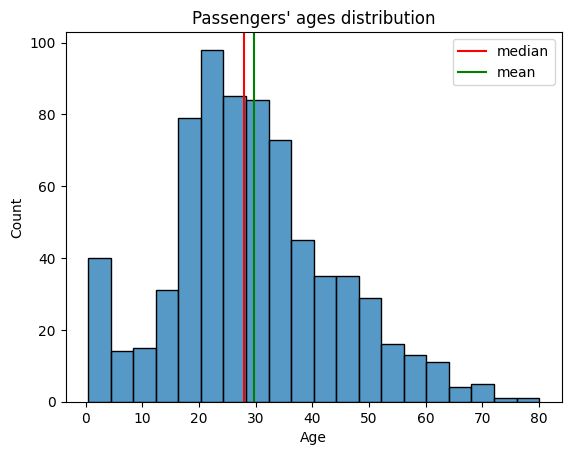

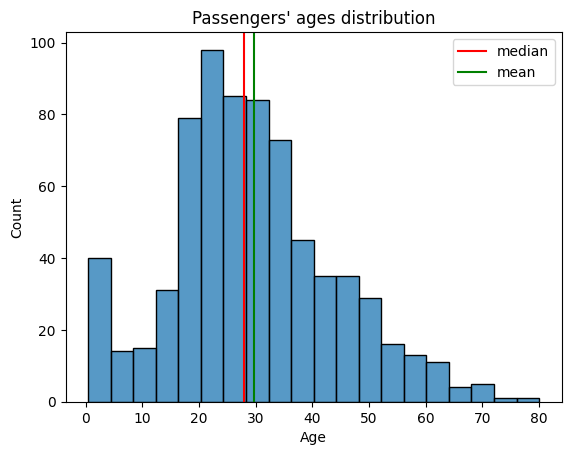

In [9]:
sns.histplot(df, x='Age')
median = df['Age'].median()
mean = df['Age'].mean()
plt.axvline(median, color='r', label='median')
plt.axvline(mean, color='g', label='mean')
plt.title("Passengers' ages distribution")
plt.legend()
plt.show()

На гістограмі зображено розподіл частот за віком пасажирів.

На кораблі переважно була молодь віком від 16 до 37 років. Більшість (>100) мають вік від 20 до 25 років. Також виділяється кількість дітей до 5 років (40). Найменша кількість припадає на вік 60+. Кількість пасажирів від 30 до 80 років рівномірно спадає. Найрізкіший перепад бачимо серед пасажирів віком 13—17 і 17—20 років. Медіана припадає на вік ~28 років, середнє — майже 30.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Який зв'язок між портом посадки, класом і відсотком виживання?

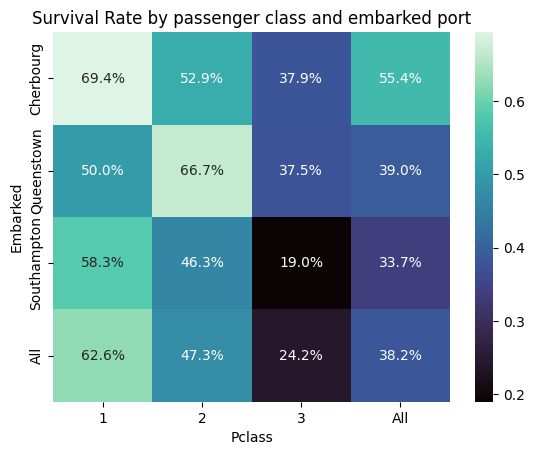

In [17]:
survival_table = df.pivot_table(index='Embarked',
                                columns='Pclass',
                                values='Survived',
                                aggfunc=np.mean,
                                margins=True)

# Відображення heatmap
sns.heatmap(survival_table, annot=True, fmt='.1%',
            cmap=sns.color_palette("mako", as_cmap=True),
            yticklabels=('Cherbourg', 'Queenstown', 'Southampton', 'All'))

# Додавання заголовку
plt.title('Survival Rate by passenger class and embarked port')

# Відображення heatmap
plt.show()

На діаграмі бачимо відсотки виживання залежно від порту відправки та класу.

Загальний відсоток уцілілих на кораблі складає 38,2%. Найвищий відсоток (69.4%) — у пасажирів з порту Шербур, 1 класу. Найнижчий (19%) — порт Саутемптон, 3 клас. Відносно високий відсоток (66.7%) видно для порту Квінстаун, 2 класу. Помітно, що зі збільшенням номеру класу відсоток уцілілих спадає. Серед портів найгіршу ситуацію має Саутемптон (33.7%), найкращу (55.4%) — Шербур.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

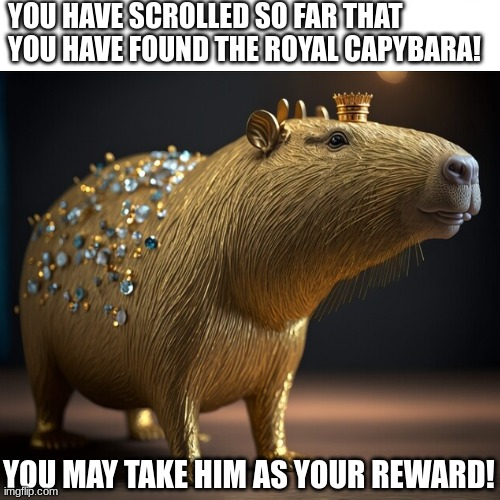